In [2]:
import numpy as np 
import pandas as pd

# plots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Carga de Datos

In [3]:
enero = pd.read_csv('properties/properati-AR-2016-01-01-properties-sell.csv')
febrero = pd.read_csv('properties/properati-AR-2016-02-01-properties-sell.csv')
marzo = pd.read_csv('properties/properati-AR-2016-03-01-properties-sell.csv')
abril = pd.read_csv('properties/properati-AR-2016-04-01-properties-sell.csv')
mayo = pd.read_csv('properties/properati-AR-2016-05-01-properties-sell.csv')
junio = pd.read_csv('properties/properati-AR-2016-06-01-properties-sell.csv')
semestre = pd.concat([enero, febrero, marzo, abril, mayo, junio])

# Promedio de precios en USD por barrio

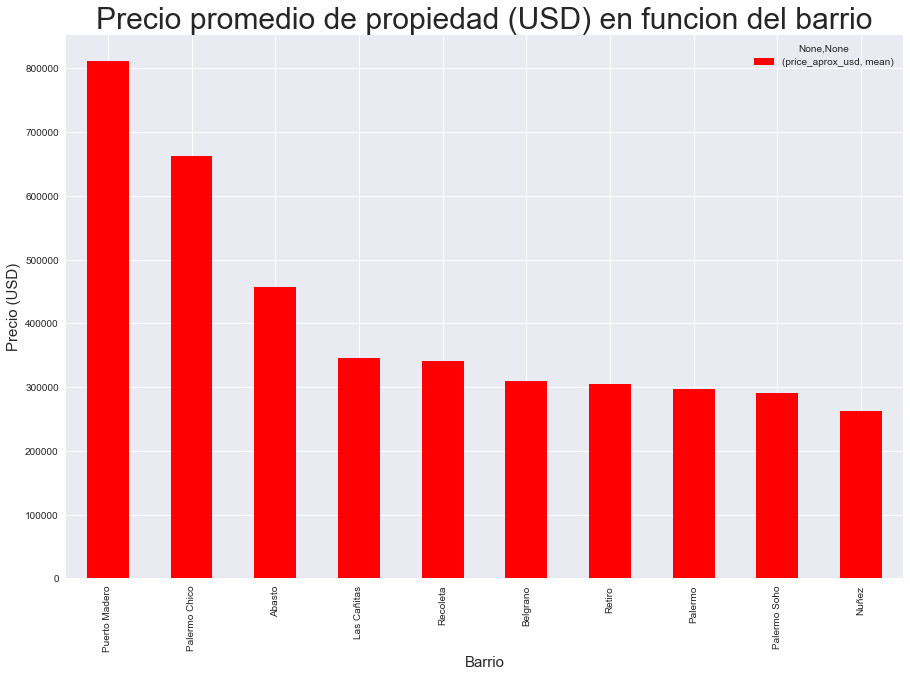

In [30]:
#Promedio para enero
sem_pr = semestre.loc[semestre.state_name.str.contains('Capital Federal') & (semestre.place_name.str.contains('Capital Federal') == False) \
                   ,['place_name', 'price_aprox_usd']].groupby('place_name').agg([np.mean,np.size])
sem_pr = sem_pr.loc[sem_pr[('price_aprox_usd', 'size')]>100,:].sort_values(('price_aprox_usd', 'mean'), ascending = False).head(10)
sem_pr.drop([('price_aprox_usd', 'size')], axis = 1, inplace=True)
fig = sem_pr.plot(kind='bar', figsize =(15,10), color='r')
fig.set_title('Precio promedio de propiedad (USD) en funcion del barrio', size = 30)
fig.set_xlabel('Barrio', size = 15)
fig.set_ylabel('Precio (USD)', size = 15)